In [1]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [2]:
%reset -f
import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
from importlib import reload

reload(sparg)
warnings.simplefilter("always")

In [3]:
ts = tskit.load("slim/slim_0.25rep1sigma.trees")

for sd in range(4):
    np.random.seed(sd)
    keep_nodes = list(np.random.choice(ts.samples(), 100, replace=False))
    ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
    ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
    ts_chopped = ts_filtered.decapitate(10000)
    ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

    outfile = open("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_" + str(sd) + "_chopped_10000.txt", "w")
    i = 0
    for bp in ts_chopped_attached.breakpoints():
        if i < 150:
            if i > 0:
                if i in range(0,150,10):
                    print(sd, i)
                ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
                ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_short)
                ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
                ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
                dispersal_rate, FI, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts_short_attached, minimal = False, n_r = 'Sample', fisher_info=True)
                dispersal_rate_rank, FI_rank, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts_short_attached, minimal = False, n_r = 'Rank', fisher_info=True)

                outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(FI) + " " + str(dispersal_rate_rank[0][0]) + " " + str(dispersal_rate_rank[1][1]) + " " + str(FI_rank) + " " + str(len(paths)) + "\n")
                #print("Number of trees:", ts_short_attached.num_trees)
                #print("Sequence length:", int(bp))
                #print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
                #print("Rank of the Matrix:", np.linalg.matrix_rank(cov_mat))
                #print("Number of Paths:", cov_mat.shape)
                #if ts_short_attached.num_trees == 2:
                #    viz.D3ARG(ts=ts_short_attached).draw()
        else:
            break
        i += 1
    outfile.close()

Bias Correction 1.0 (100, 100) (100, 100) 1
Bias Correction 1.0000000000000002 (100, 100) (101, 101) 1
Bias Correction 1.0 (100, 100) (131, 131) 1
Bias Correction 1.0 (100, 100) (132, 132) 1
Bias Correction 0.9999999999999999 (100, 100) (136, 136) 1
Bias Correction 1.0 (100, 100) (138, 138) 1
Bias Correction 1.0 (100, 100) (210, 210) 1
Bias Correction 1.0000000000000002 (100, 100) (212, 212) 1
Bias Correction 0.9999999999999999 (100, 100) (217, 217) 1
0 10
Bias Correction 1.0 (100, 100) (227, 227) 1
Bias Correction 1.0 (100, 100) (245, 245) 1
Bias Correction 0.9999999999999999 (100, 100) (253, 253) 1
Bias Correction 0.9999999999999999 (100, 100) (255, 255) 1
Bias Correction 1.0 (100, 100) (256, 256) 1
Bias Correction 1.0000000000000004 (100, 100) (260, 260) 1
Bias Correction 0.9999999999999998 (100, 100) (281, 281) 1
Bias Correction 1.0000000000000002 (100, 100) (285, 285) 1
Bias Correction 1.0 (100, 100) (286, 286) 1
Bias Correction 1.0 (100, 100) (290, 290) 1
0 20
Bias Correction 1.0

KeyboardInterrupt: 

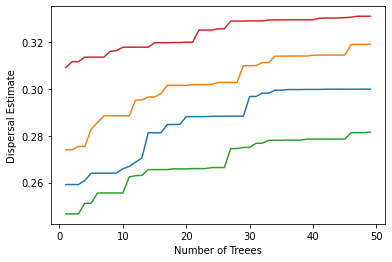

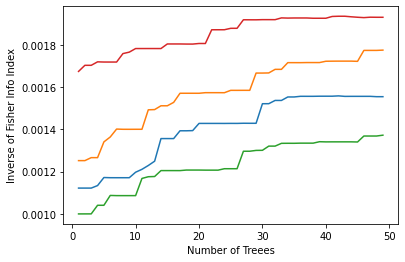

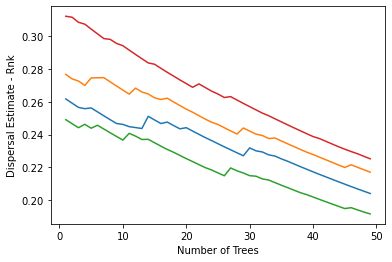

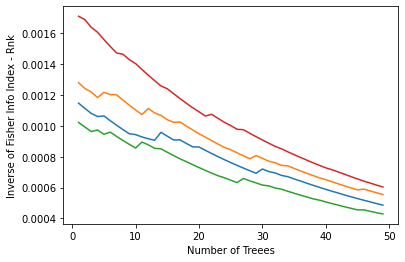

In [9]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_0_chopped_10000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])

dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_1_chopped_10000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])

dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_2_chopped_10000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])

dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_CorrectedRankSample_FI_100_seqlen_3_chopped_10000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.xlabel("Number of Treees")
plt.ylabel("Dispersal Estimate")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,4])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,4])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,4])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,4])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index")
plt.show()

plt.plot(dispersal_1[:,0], dispersal_1[:,5])
plt.plot(dispersal_2[:,0], dispersal_2[:,5])
plt.plot(dispersal_3[:,0], dispersal_3[:,5])
plt.plot(dispersal_4[:,0], dispersal_4[:,5])
plt.xlabel("Number of Trees")
plt.ylabel("Dispersal Estimate - Rnk")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index - Rnk")
plt.show()


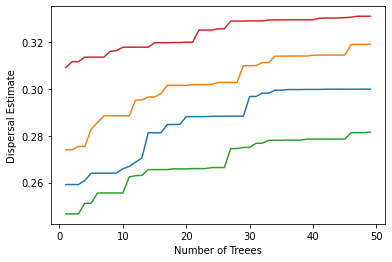

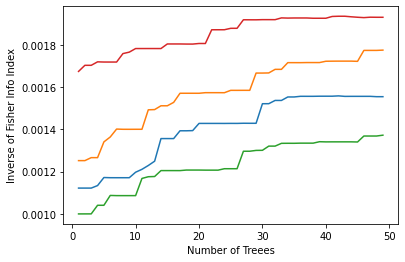

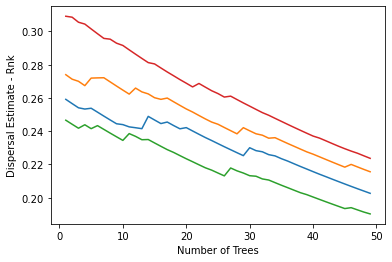

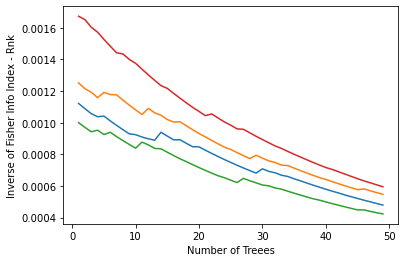

In [5]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_0_chopped_10000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])

dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_1_chopped_10000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])

dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_2_chopped_10000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])

dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_RankSample_FI_100_seqlen_3_chopped_10000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.xlabel("Number of Treees")
plt.ylabel("Dispersal Estimate")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,4])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,4])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,4])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,4])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index")
plt.show()

plt.plot(dispersal_1[:,0], dispersal_1[:,5])
plt.plot(dispersal_2[:,0], dispersal_2[:,5])
plt.plot(dispersal_3[:,0], dispersal_3[:,5])
plt.plot(dispersal_4[:,0], dispersal_4[:,5])
plt.xlabel("Number of Trees")
plt.ylabel("Dispersal Estimate - Rnk")
plt.show()

plt.plot(dispersal_1[:,0], 1/dispersal_1[:,7])
plt.plot(dispersal_2[:,0], 1/dispersal_2[:,7])
plt.plot(dispersal_3[:,0], 1/dispersal_3[:,7])
plt.plot(dispersal_4[:,0], 1/dispersal_4[:,7])
plt.xlabel("Number of Treees")
plt.ylabel("Inverse of Fisher Info Index - Rnk")
plt.show()



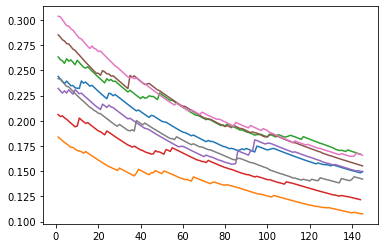

In [11]:
dispersal_1 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_0_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.show()

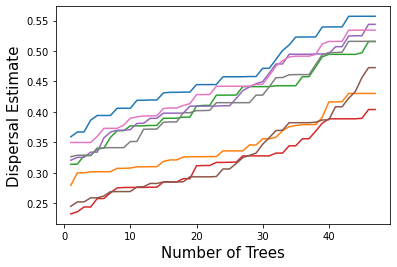

In [9]:
dispersal_1 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_4_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.xlabel("Number of Trees", fontsize = 15)
plt.ylabel("Dispersal Estimate", fontsize = 15)
plt.show()


In [7]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(3)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(len(paths)) + "\n")
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()

AttributeError: module 'sparg' has no attribute 'new_remove_useless_nodes'

# Minimal Covariance Matrix

In [4]:
tables = tskit.TableCollection(sequence_length=1e3)

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual = 2)  # Node 2
node_table.add_row(time=1)  # Node 3
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 4
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 5
node_table.add_row(time=3)  # Node 6
node_table.add_row(time=4)  # Node 7

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=3, child=0)
edge_table.add_row(left=0, right=1e3, parent=3, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=2)
edge_table.add_row(left=0, right=500, parent=4, child=3)
edge_table.add_row(left=500, right=1e3, parent=5, child=3)
edge_table.add_row(left=500, right=1e3, parent=6, child=5)
edge_table.add_row(left=0, right=500, parent=7, child=4)
edge_table.add_row(left=0, right=500, parent=7, child=6)

individuals_table = tables.individuals 
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)
individuals_table.add_row(flags = 0)

tables.sort()


ts = tables.tree_sequence()
viz.D3ARG(ts=ts).draw(edge_type="ortho")
print(ts.tables.individuals)

/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


╔══╤═════╤════════╤═══════╤════════╗
║id│flags│location│parents│metadata║
╠══╪═════╪════════╪═══════╪════════╣
║0 │    0│        │       │        ║
║1 │    0│        │       │        ║
║2 │    0│        │       │        ║
╚══╧═════╧════════╧═══════╧════════╝



In [5]:
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts)
cov_mat, paths = sparg.calc_covariance_matrix(ts)
print(cov_mat, paths)
print(cov_min_mat, min_paths )

[[4. 3. 0. 2. 1.]
 [3. 4. 0. 1. 2.]
 [0. 0. 4. 1. 1.]
 [2. 1. 1. 4. 3.]
 [1. 2. 1. 3. 4.]] [[0, 3, 4, 7], [1, 3, 4, 7], [2, 6, 7], [0, 3, 5, 6, 7], [1, 3, 5, 6, 7]]
[[4. 1. 0. 2.]
 [1. 4. 1. 3.]
 [0. 1. 4. 1.]
 [2. 3. 1. 4.]] [[0, 3, 4, 7], [1, 3, 5, 6, 7], [2, 6, 7], [0, 3, 5, 6, 7]]


In [6]:
node_locations = {0:[0], 1:[1], 2:[2]}

sigma, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = False, locations_of_individuals=node_locations)
sigma_min, min_cov_mat, min_paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = True,  locations_of_individuals=node_locations)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] [[0, 3, 4, 7], [1, 3, 4, 7], [2, 6, 7], [0, 3, 5, 6, 7], [1, 3, 5, 6, 7]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] [[0, 3, 4, 7], [1, 3, 5, 6, 7], [2, 6, 7], [0, 3, 5, 6, 7]]


In [11]:
print(sigma, sigma_min)

[[0.30952381]] [[0.30952381]]


In [19]:
import time
seed = 100
outfile = open("Minimal_CovMat_Data.txt", "w")
break_flag = False 

for n in range(2,40): 
    for rep in range(10): 
        print(n,rep)
        ts = msprime.sim_ancestry(samples=n, recombination_rate=1e-6, sequence_length=50, population_size=10_000, record_full_arg=True, random_seed = rep+seed)    
        ts_chopped = ts.decapitate(5000)
        ts_short_sim, maps_short_sim = sparg.remove_uninformative_nodes(ts=ts_chopped)
        ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
        ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
        
        min_start_time = time.time() 
        cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_short_attached)
        min_end_time = time.time()
        
        full_start_time = time.time()
        cov_mat, paths = sparg.calc_covariance_matrix(ts_short_attached)
        full_end_time = time.time() 
        print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))
        
        if np.linalg.matrix_rank(cov_min_mat) != np.linalg.matrix_rank(cov_mat):
            ts_new = ts_short_attached
            break_flag = True 
            print("Broke")
            break

        outfile.write(str(n) + " " + str(len(cov_mat)) + " " + str(len(cov_min_mat)) + " " + str( np.linalg.matrix_rank(cov_mat)) + " " + str(min_end_time - min_start_time) + " " + str(full_end_time - full_start_time) + "\n")
        #node_locations = {i:[np.random.uniform(0,100)] for i in range(100)}
        #sigma, cov_mat, paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = False, locations_of_individuals=node_locations)
        #sigma_min, min_cov_mat, min_paths = sparg.new_estimate_spatial_parameters(ts=ts, minimal = True,  locations_of_individuals=node_locations)
    
        #print(sigma, sigma_min)  
    if break_flag: 
        break

2 0
2 2 2 2
2 1
6 7 6 6
2 2
4 4 3 3
2 3
4 4 4 4
2 4
3 3 3 3
2 5
3 3 3 3
2 6
5 5 4 4
2 7
7 9 5 5
2 8
4 4 3 3
2 9
2 2 2 2
3 0
6 6 6 6
3 1
8 12 8 9
Broke


/tmp/ipykernel_83360/2884627010.py:3: ResourceWarning: unclosed file <_io.TextIOWrapper name='Minimal_CovMat_Data.txt' mode='w' encoding='UTF-8'>
  outfile = open("Minimal_CovMat_Data.txt", "w")


In [26]:
print(ts_new.tables.nodes)
print(min_paths)
print(paths)
print(cov_min_mat)


╔══╤══════╤══════════╤══════════╤═════════════╤════════╗
║id│flags │population│individual│time         │metadata║
╠══╪══════╪══════════╪══════════╪═════════════╪════════╣
║0 │     1│         0│         0│   0.00000000│        ║
║1 │     1│         0│         0│   0.00000000│        ║
║2 │     1│         0│         1│   0.00000000│        ║
║3 │     1│         0│         1│   0.00000000│        ║
║4 │     1│         0│         2│   0.00000000│        ║
║5 │     0│         0│        -1│1072.22472745│        ║
║6 │131072│         0│        -1│1190.13281227│        ║
║7 │131072│         0│        -1│1190.13281227│        ║
║8 │131072│         0│        -1│1195.58887330│        ║
║9 │131072│         0│        -1│1195.58887330│        ║
║10│262144│         0│        -1│1520.88829290│        ║
║11│     0│         0│        -1│1933.55919453│        ║
║12│131072│         0│        -1│3013.79335234│        ║
║13│131072│         0│        -1│3013.79335234│        ║
║14│131072│         0│        -

In [5]:
print(ts_short_attached.tables.edges[np.where(ts_short_attached.tables.edges.child == 74)[0]])
a = {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 45: [0], 46: [40], 40: [1], 41: [41], 58: [2], 59: [42], 104: [3], 105: [43], 112: [4], 113: [44], 90: [5], 91: [45], 49: [6, 14], 43: [7], 44: [46], 117: [8], 92: [9, 25], 102: [10], 97: [11, 26], 135: [12], 54: [13, 15, 20], 42: [15, 20], 47: [16], 48: [47], 66: [17, 39], 101: [18, 30], 62: [19, 22], 63: [21, 33], 56: [22], 57: [48], 187: [23], 74: [24, 34, 57], 68: [26], 69: [49], 115: [27, 31, 48], 98: [28], 67: [29, 35], 70: [31, 48], 77: [32, 2], 50: [34], 51: [50], 52: [36], 53: [51], 99: [37], 100: [52], 93: [38, 58, 36], 64: [1], 65: [53], 82: [41], 83: [54], 84: [7, 1], 116: [46, 51], 121: [0], 158: [40], 159: [55], 210: [16], 55: [47, 36], 107: [6], 108: [56, 14], 60: [34], 61: [57], 118: [50], 141: [13, 15, 20], 72: [47], 73: [58, 36], 139: [42], 71: [34, 57], 170: [19], 171: [59, 22], 130: [21], 131: [60, 33], 89: [53], 172: [17, 39], 78: [29], 79: [61, 35], 80: [49], 81: [62], 87: [47], 88: [63], 75: [24, 34, 57], 76: [], 85: [24, 34, 57], 86: []}
paths = [[0, 45, 121], [1, 40, 64, 84], [2, 58, 77], [3, 104], [4, 112], [5, 90], [6, 49, 107], [7, 43, 84], [8, 117], [9, 92], [10, 102], [11, 97], [12, 135], [13, 54, 141], [14, 49, 108], [15, 42, 54, 141], [16, 47, 210], [17, 66, 172], [18, 101], [19, 62, 170], [20, 42, 54, 141], [21, 63, 130], [22, 56, 62, 171], [23, 187], [24, 74, 75, 85], [25, 92], [26, 68, 97], [27, 115], [28, 98], [29, 67, 78], [30, 101], [31, 70, 115], [32, 77], [33, 63, 131], [34, 50, 60, 71, 74, 75, 85], [35, 67, 79], [36, 52, 55, 73, 93], [37, 99], [38, 93], [39, 66, 172], [0, 46, 158], [1, 41, 82], [2, 59, 139], [3, 105], [4, 113], [5, 91], [7, 44, 116], [16, 48, 55, 72, 87], [22, 57, 70, 115], [26, 69, 80], [34, 51, 118], [36, 53, 116], [37, 100], [1, 40, 65, 89], [1, 41, 83], [0, 46, 159], [6, 49, 108], [34, 50, 61, 71, 74, 75, 85], [16, 48, 55, 73, 93], [19, 62, 171], [21, 63, 131], [29, 67, 79], [26, 69, 81], [16, 48, 55, 72, 88]]
print(a[74], a[75], a[76])
print(paths[24],paths[34], paths[57])


╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  829│    75│   74│        ║
║1 │ 829│ 1000│    76│   74│        ║
╚══╧════╧═════╧══════╧═════╧════════╝

[24, 34, 57] [24, 34, 57] []
[24, 74, 75, 85] [34, 50, 60, 71, 74, 75, 85] [34, 50, 61, 71, 74, 75, 85]


In [40]:
np.random.uniform(0,100)


72.0324493442158

In [41]:
ts_new.draw_svg()
cov_min_mat, min_paths = sparg.calc_minimal_covariance_matrix(ts_new)
cov_mat, paths = sparg.calc_covariance_matrix(ts_new)
print(len(cov_min_mat), len(cov_mat), np.linalg.matrix_rank(cov_min_mat), np.linalg.matrix_rank(cov_mat))


13 14 11 11


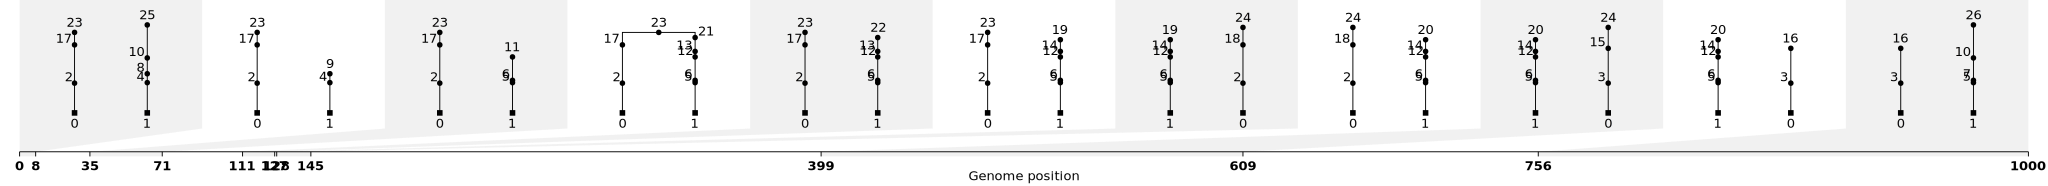

In [42]:
ts_new.draw_svg()

In [43]:
ts_new.tables.edges

id,left,right,parent,child,metadata
0,0,399,2,0,
1,399,1000,3,0,
2,0,35,4,1,
3,35,1000,5,1,
4,35,756,6,5,
5,756,1000,7,5,
6,0,8,8,4,
7,8,35,9,4,
8,756,1000,10,7,
9,0,8,10,8,


In [36]:
ts_new.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,131072,0,-1,443.96869070,
3,131072,0,-1,443.96869070,
4,131072,0,-1,1990.34663844,
5,131072,0,-1,1990.34663844,
6,131072,0,-1,2838.01027670,
7,131072,0,-1,2838.01027670,
8,131072,0,-1,3350.61144254,
9,131072,0,-1,3350.61144254,


In [37]:
min_paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 18, 19],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19]]

In [38]:
paths

[[0, 2, 4, 8, 12, 19],
 [1, 10, 16, 17, 20],
 [0, 3, 16, 17, 20],
 [1, 11, 14],
 [0, 2, 5, 6],
 [0, 2, 4, 9],
 [0, 2, 5, 7, 20],
 [0, 2, 4, 8, 13],
 [1, 11, 15],
 [0, 3, 16, 18, 19],
 [1, 10, 16, 18, 19]]

# Non Ancestral Edge under simplify

In [29]:
def ts_stacked(x=0.25, n=1, seq_len = 1000 ):     
    ts_stacked = tskit.TableCollection(sequence_length=1e3)
    n_nodes = 3 + n*3
    # n_steps = 3 + 2*n 
    
    node_table = ts_stacked.nodes
    flag_list = np.zeros((n_nodes,))
    flag_list[0] = 1
    flag_list[1] = 1
    time_list = np.zeros((n_nodes,))
    time_list[-1] = (3 +2*n )*x
    
    for i in range(n):
        flag_list[2 +3*i] = 131072
        flag_list[2 +3*i + 1] = 131072
        time_list[2 +3*i] = (3 + 2*i)*x
        time_list[2 +3*i + 1] = (3 + 2*i)*x
        time_list[2 +3*i + 2] = (3 + 2*i + 1)*x
    
    node_table.set_columns(
        flags = np.array(flag_list, dtype=np.uint32),
        time = np.array(time_list),
        individual = np.array(list(range(2)) + [-1 for i in range(n_nodes-2)], dtype = np.int32)
    )
    
    individual_table = ts_stacked.individuals 
    individual_table.set_columns( 
        flags = np.array([0,0], dtype = np.uint32),
        location = np.array([-0.5,0.5]),
        location_offset = np.array([0,1,2], dtype = np.uint64) 
    )
    
    edge_table = ts_stacked.edges
    
    seqlen = seq_len/float(n+1)
    child = [0,0,1]
    parent = [2,3,4]
    left = [ seqlen, 0, 0  ]
    right = [ (n+1)*seqlen, seqlen, (n+1)*seqlen ] 
    for i in range(n-1): 
        child += [ 2 + 3*i, 2+3*i, 2+3*i+1, 2+3*i+2 ]
        parent += [ 2 + 3*(i+1), 2+3*(i+1)+1, 2+3*i+2, 2+3*(i+1)+2 ]
        left += [(i+2)*seqlen , (i+1)*seqlen , i*seqlen , (i+1)*seqlen ]
        right += [(n+1)*seqlen , (i+2)*seqlen , (i+1)*seqlen  , (n+1)*seqlen ]
    child += [2+3*(n-1), 3*n, 3*n+1  ]
    parent += [2+3*n, 3*n+1, 3*n+2 ]
    left += [n*seqlen, (n-1)*seqlen, n*seqlen ]
    right += [(n+1)*seqlen, n*seqlen, (n+1)*seqlen]
    
    # print(child)
    # print(parent)
    # print(left)
    # print(right)
    
    edge_table.set_columns(
        left=np.array(left),
        right=np.array(right),
        parent=np.array(parent, dtype=np.int32),  # References IDs in the node table
        child=np.array(child, dtype=np.int32),  # References IDs in the node table
    )
    ts_stacked.sort()
    return ts_stacked.tree_sequence()

ts = ts_stacked(n=2)
ts_tables = ts.dump_tables() 
ts_edges = ts_tables.edges
ts_edges.left = [0,500,0,500,0,700,0,700,0,0]
ts_edges.right = [500,1000,1000,1000,700,1000,500,1000,700,1000]
ts_tables.sort()
ts = ts_tables.tree_sequence()
viz.D3ARG(ts=ts).draw(edge_type="ortho")


/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [20]:
print(ts.tables.edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │ 500│ 1000│     3│    0│        ║
║2 │   0│ 1000│     4│    1│        ║
║3 │ 500│ 1000│     4│    3│        ║
║4 │   0│  700│     5│    2│        ║
║5 │ 700│ 1000│     6│    2│        ║
║6 │   0│  500│     7│    4│        ║
║7 │ 700│ 1000│     7│    6│        ║
║8 │   0│  700│     8│    5│        ║
║9 │   0│ 1000│     8│    7│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



In [33]:
ts_sim = ts.simplify(samples= [0,1], keep_unary = True, keep_input_roots = True)
viz.D3ARG(ts=ts_sim).draw(edge_type="ortho")


/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/puneeth/anaconda3/lib/python3.9/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [35]:
print(ts_sim.tables.edges)
print(ts_sim.tables.nodes)


╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  500│     2│    0│        ║
║1 │ 500│ 1000│     3│    0│        ║
║2 │   0│ 1000│     4│    1│        ║
║3 │ 500│ 1000│     4│    3│        ║
║4 │   0│  500│     5│    2│        ║
║5 │   0│  500│     6│    4│        ║
║6 │   0│  500│     7│    5│        ║
║7 │   0│  500│     7│    6│        ║
╚══╧════╧═════╧══════╧═════╧════════╝

╔══╤══════╤══════════╤══════════╤══════════╤════════╗
║id│flags │population│individual│time      │metadata║
╠══╪══════╪══════════╪══════════╪══════════╪════════╣
║0 │     1│        -1│         0│0.00000000│        ║
║1 │     1│        -1│         1│0.00000000│        ║
║2 │131072│        -1│        -1│0.75000000│        ║
║3 │131072│        -1│        -1│0.75000000│        ║
║4 │     0│        -1│        -1│1.00000000│        ║
║5 │131072│        -1│        -1│1.25000000│        ║
║6 │     0│        -1│        -1│1.50000000│        ║
║7 

In [36]:
ts.simplify?